# Association analysis - Instacart

Task: find the k=4 items that were bought together more than t=340 times.

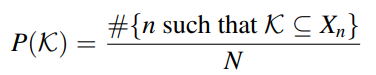

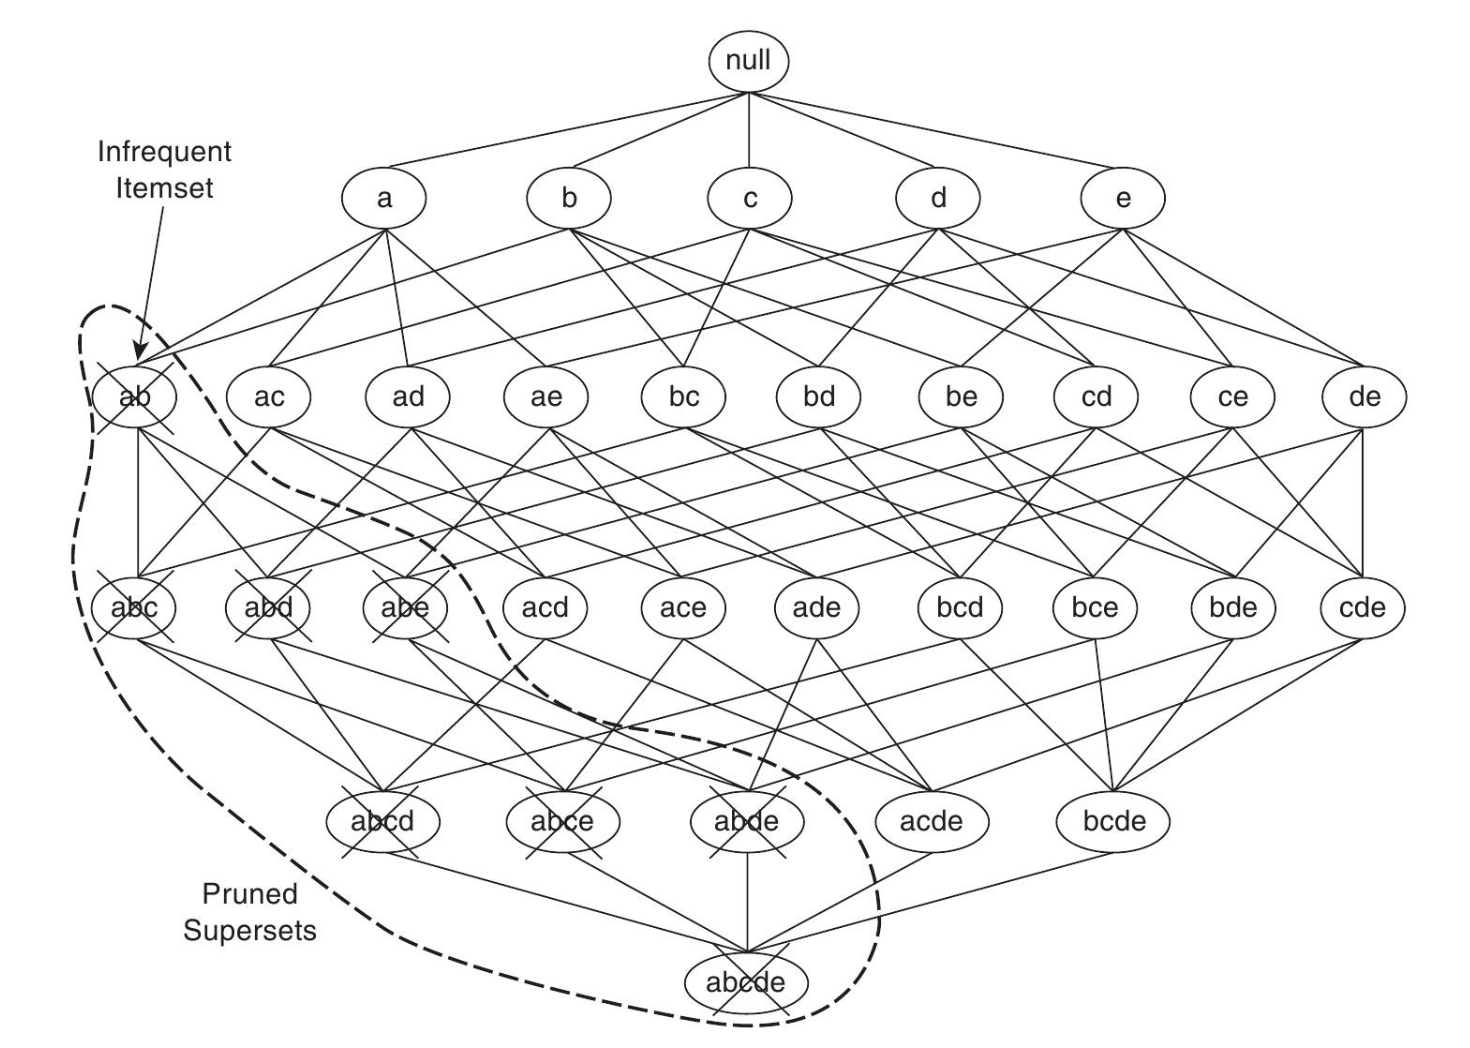

In [1]:
import pandas as pd
import numpy as np
import itertools as it
pd.__version__

'0.25.3'

In [2]:
data = pd.read_csv('./insta_cart_subset.csv').sort_values(by=['order_id'])
print("Matrix entries: {}".format(data.shape[0]))
print("Number of unique products: {}".format(len(data.product_id.unique())))
print("Number of orders: {}".format(len(data.order_id.unique())))
data.head()

Matrix entries: 2686226
Number of unique products: 41670
Number of orders: 250000


,order_id,product_id
0,7,34050
1,7,46802
14,13,25952
12,13,36086
11,13,23020


In [3]:
#provided
def product_combinations(df, k):
    # Group elements by order_id and compute element combinations of lenght k
    gr = df.groupby('order_id')['product_id'].apply(lambda x: list(it.combinations(sorted(x), k)))
    #print("data ordered",gr)
    # Stack combinations for the same order
    # pd.Series().explode() function is only available in pandas version > 0.25
    print()
    v = [int(x) for x in pd.__version__.split('.')]
    #print("v",v)
    if v[0] < 1 and v[1] < 25:
        # use inefficient explode
        co = gr.apply(pd.Series).stack().reset_index(level=0).rename(columns={0:'product_id'})
    else: 
        co = pd.DataFrame(gr.explode())
        co.reset_index(level=0, inplace=True)
        
    # Retrieve orders for each combination
    oc = co.groupby('product_id')['order_id'].count()
    
    # Return
    combinations_per_order = co
    orders_per_combination = oc
    return combinations_per_order, orders_per_combination

In [4]:
def get_products_from_combinations(combinations):
    return np.unique(np.array([list(x) for x in combinations]).ravel())

In [5]:
def order_sizes(df):
    return df.groupby('order_id').apply(len)

In [6]:
def four_items(data):
    orders=data.copy()
    for k in [2,3,4]:     
        combinations_per_order, orders_per_combination = product_combinations(orders,k)
        #remove product combinations that appear in less than t=340 offers:
        viable_combinations = orders_per_combination[orders_per_combination >= 340].index 
        viable_products = get_products_from_combinations(viable_combinations)
        #remove orders not contained in viable combinations:
        orders = orders[orders.product_id.isin(viable_products)] 
        viable_order_sizes = order_sizes(orders) 
         #remove orders that don't have more than k items:
        orders = orders[orders.order_id.isin(viable_order_sizes[viable_order_sizes > k].index)]
    print("viable products, product_id's:",viable_products)
    return orders 

In [7]:
%%time
orders_out=four_items(data)




viable products, product_id's: [13176 21137 27966 47209]
Wall time: 3min 15s


Result: the final four products with the above product id's were found from a dataset with 41670 unique products